In [1]:
import numpy as np
from PIL import Image

In [2]:
def apply_filter(np_image, np_kernel):

    if len(np_image.shape) == 2:
        np_image = np.expand_dims(np_image, axis=-1)
        np_image_height, np_image_width, np_image_channel= np_image.shape
    elif len(np_image.shape) == 3:
        np_image_height, np_image_width, np_image_channel= np_image.shape
    else:
        raise ValueError("Image shape not supported")
    
    kernel_height, kernel_width = np_kernel.shape

    pad_x = kernel_width // 2
    pad_y = kernel_height // 2

    np_padded_image = np.pad(np_image, ((pad_y, pad_y), (pad_x, pad_x), (0, 0)), mode='reflect')
    output= np.zeros_like(np_padded_image, dtype=np.float32)

    for y in range(np_image_height):
        for x in range(np_image_width):
            for c in range(np_image_channel):
                region = np_padded_image[y:y + kernel_height, x:x + kernel_width, c]
                output[y, x, c] = np.sum(region * np_kernel)
    
    output = np.clip(output, 0, 255)
    output = output[:np_image_height, :np_image_width, :]
    return output.astype(np.uint8)

In [3]:
import matplotlib.pyplot as plt

def display_original_and_filtered_images(np_input_image, np_output_image, alpha):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(np_input_image.shape[1] / 50, np_input_image.shape[0] / 50), dpi=100)

    ax1.imshow(np_input_image)
    ax1.set_title('Original')

    ax2.imshow(np_output_image)
    ax2.set_title(f'Filtered, Alpha: {alpha}')

    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0.2)

    plt.savefig(f'output_image_alpha_{alpha}.png', bbox_inches='tight', pad_inches=0.1)
    plt.show()
    

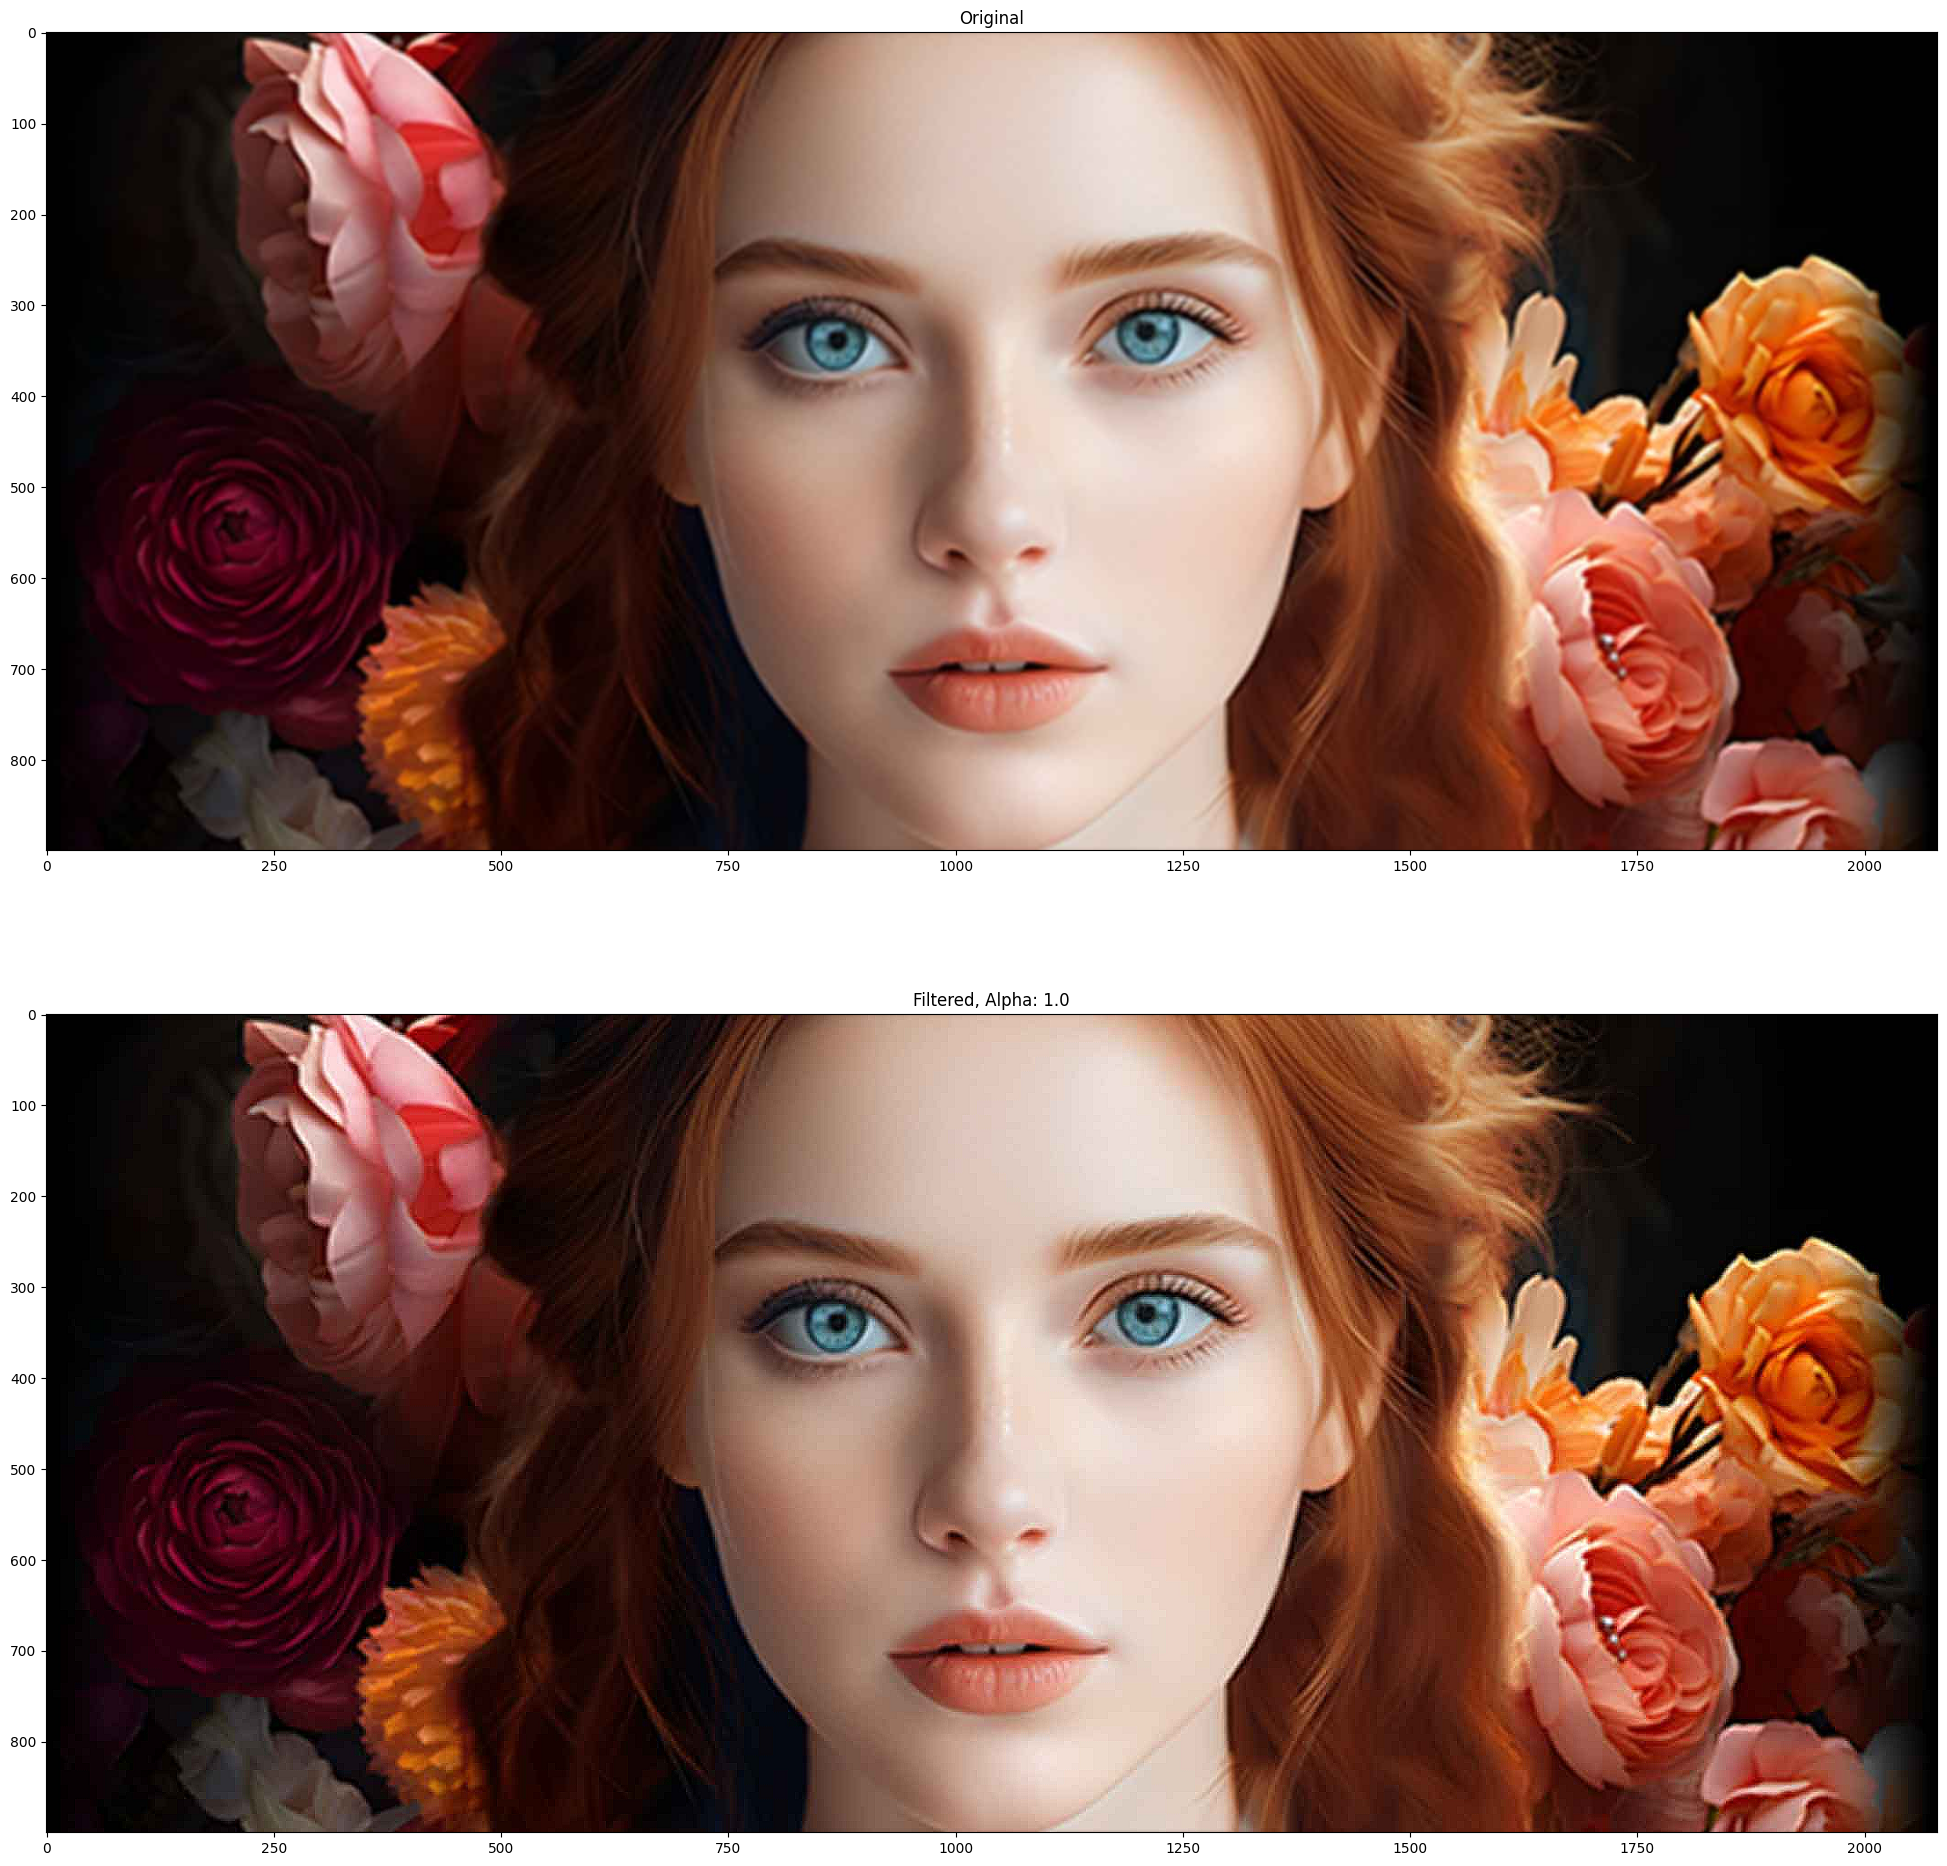

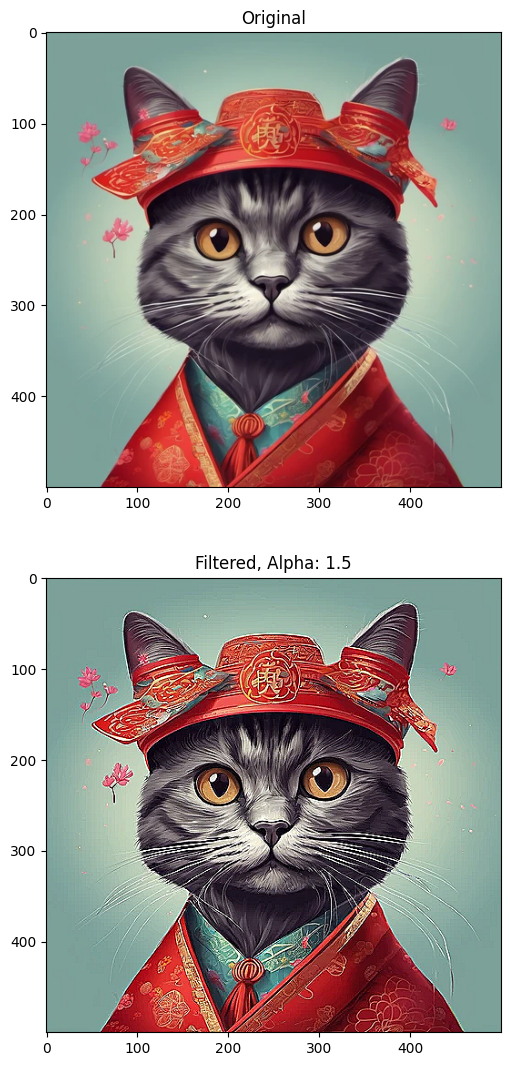

In [4]:
image_list = ["images/low_quality.png", "images/medium.png"]
alpha_list = [1., 1.5]

for idx, image_path in enumerate(image_list):
    input_image = Image.open(image_path).convert("RGB")
    np_input_image = np.array(input_image)
    alpha = alpha_list[idx]
    sharpening_filter = np.array([[0., -alpha, 0.], [-alpha, 1.+(4.*alpha), -alpha], [0., -alpha, 0.]])
    sharp_image = apply_filter(np_input_image, sharpening_filter)
    display_original_and_filtered_images(np_input_image, sharp_image, alpha)

